In [84]:
from htke.load_data import *
from htke.process_ir_data import *
from htke.load_conditions import *
from htke.spka import *
from htke.rpka import *
pd.options.mode.chained_assignment = None  # default='warn' stops the slice error

### Go to directory

In [85]:
%pwd
%cd ..\GL-06-50

C:\Users\Paul Dingwall\Documents\github\htke\ir_data\GL-06-50


### Load Raw Data

<AxesSubplot:xlabel='Relative Time'>

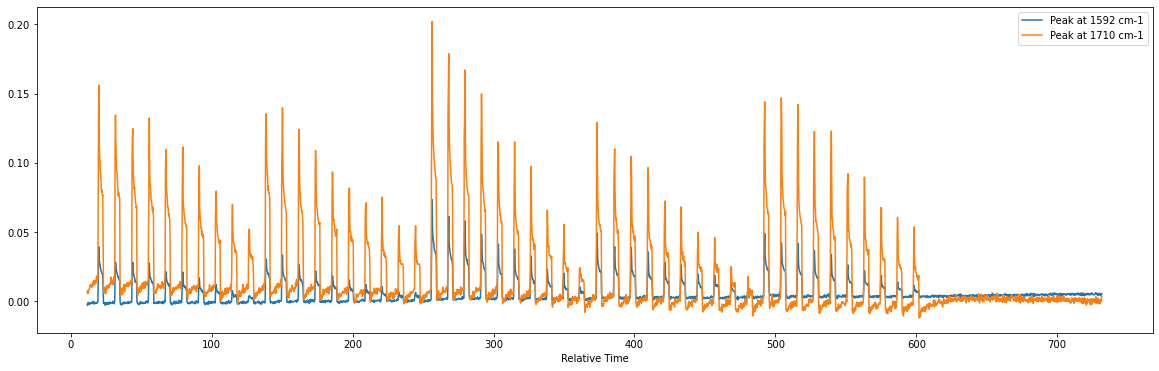

In [86]:
# Instantiate class
Data()

# Load data to dataframe
ir_data = Data.read()

# Visualise the data
Data.plot(ir_data)

#ir_data

### Find the Peaks in the Raw Data

In [87]:
# Instantiate class
peaks = Peaks(ir_data)

# List all the wavelengths observed
print([col for col in ir_data.columns if 'Peak' in col])

['Peak at 1592 cm-1', 'Peak at 1710 cm-1']


In [90]:
# Choose peak
peak_of_interest = 'Peak at 1592 cm-1'

# Auto find prominence and height to match number of conditions
prominence, no_reactions = peaks.auto_prom(peak_of_interest)
height = peaks.auto_height(peak_of_interest)
residence_time = peaks.auto_area(peak_of_interest, prominence, no_reactions, 10)

print('There are', no_reactions, 'reactions')
print('Prominence threshold =', np.round(prominence, 4))
print('Height threshold =', np.round(height, 4))
print('Residence time =', np.round(residence_time, 2))

There are 5 reactions
Prominence threshold = 0.0035
Height threshold = 1.0
Residence time = 4.25


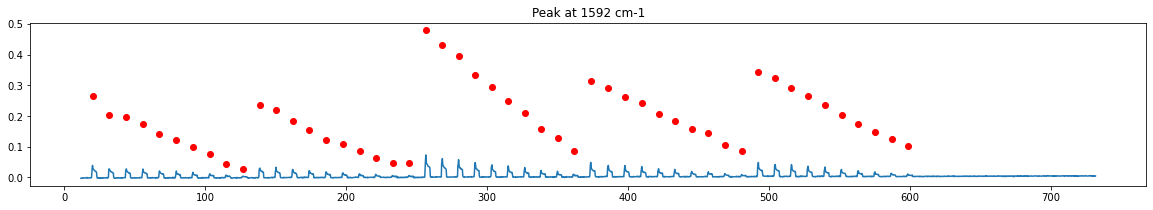

In [93]:
#residence_time=9
#prominence = 0.004
## PROMINENCE ALL WAVELENGTHS: Determine the peak prominences of every wavelength
#processed_ir_data = peaks.prominence_all(prominence)

## PROMINENCE: Determine the peak prominences of a single wavelength
#processed_ir_data = peaks.prominence(prominence, peak_of_interest)

## HEIGHT: # Determine the peak heights of a single wavelength
#processed_ir_data = peaks.height(height, peak_of_interest)

## EXP AREA: Determine the experimental areas of a single wavelength
processed_ir_data = peaks.exp_area(prominence, residence_time, peak_of_interest)

## FITTED AREA - SINGLE PEAK: Fit a gaussian to a single peak and determine it's area
#processed_ir_data= peaks.fitted_area_sp(prominence, residence_time, peak_of_interest, 0, 2, 2)

## FITTED AREA: Determine the fitted areas of a single wavelength
#processed_ir_data = peaks.fitted_area(prominence, residence_time, peak_of_interest)

## Visualise which peaks have been picked - single peak
peaks.plot(processed_ir_data, peak_of_interest)

## Compare prominence, height, experimental area, and fitted area
#r2, compare = peaks.compare_no_height(prominence, residence_time, peak_of_interest, no_reactions, 10)
# NOTE: Areas seem to give the best value when the starting point is exactly on the peak (no baseline before)

#rocessed_ir_data
#r2

In [33]:
# Trim df (if requried)
#compare = compare.iloc[:-39,:]

# Change a single cell
#processed_ir_data.iloc[0,1] = 0.46
#processed_ir_data

# Read experimental conditions and add to dataframe

In [80]:
Conditions()
experimental_data = Conditions.read(processed_ir_data)
#experimental_data

You have a problem: IR datapoints =  49 , Number of conditions =  50


### Create the SPKA profiles

In [82]:
spka = SPKA(experimental_data)

LinAlgError: SVD did not converge in Linear Least Squares

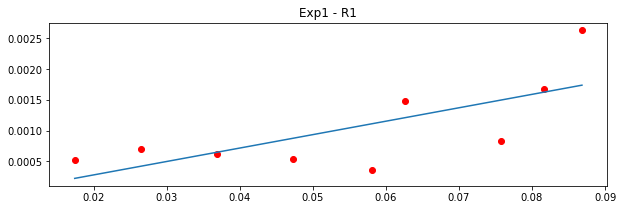

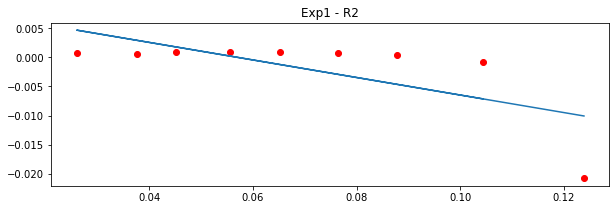

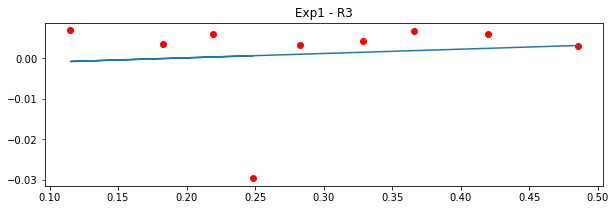

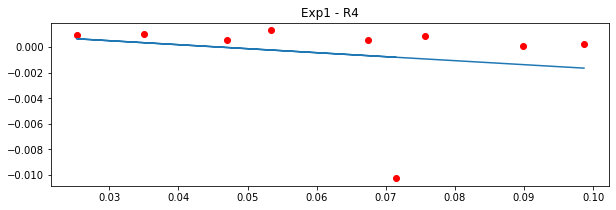

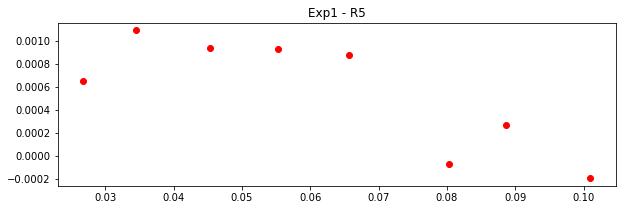

In [83]:
spka_data = spka.spka('[A]0')
spka_data
spka.plot(spka_data)

## To Compare
#r2 = spka.compare('[A]0')
#r2

### Perform RPKA

In [29]:
rpka = RPKA(spka_data)

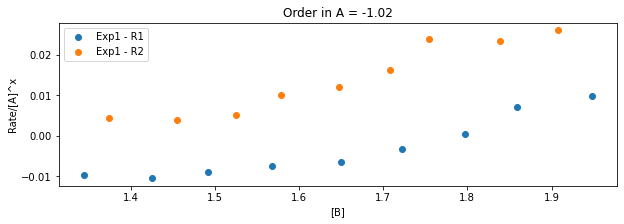

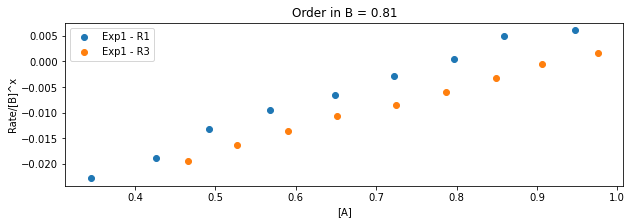

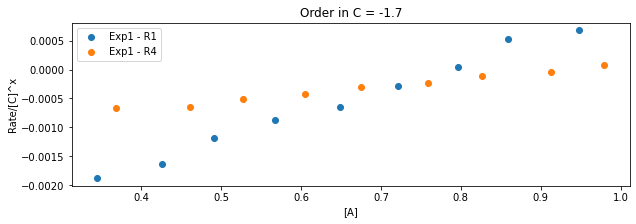

In [30]:
rpka_data = rpka.diff_excess()
#rpka_data

In [24]:
# Set up excelwriter
writer = pd.ExcelWriter('Processed - 1592 - Fitted Area.xlsx', engine='xlsxwriter')
workbook=writer.book

# Output data
#rpka_data.to_excel(writer, sheet_name='RPKA Data', startrow=0 , startcol=0, index=False)
#spka_data.to_excel(writer, sheet_name='SPKA Data', startrow=0 , startcol=0, index=False)
ir_data.to_excel(writer, sheet_name='IR Data', startrow=0 , startcol=0, index=False)
processed_ir_data.to_excel(writer, sheet_name='Processed IR', startrow=0 , startcol=0, index=False)
experimental_data.to_excel(writer, sheet_name='Experimental Data', startrow=0 , startcol=0, index=False)
#conditions.to_excel(writer, sheet_name='Conditions', startrow=0 , startcol=0, index=False)

# Save
writer.save()

# This won't work if the excel file is open